# Exercise 3 - Theory

In [6]:
import networkx as nx
from matplotlib import pyplot as plt

## Problem 1
*Consider a balanced (or Cayley) tree which is a symmetric tree, constructed starting from central node with $k \ge 2$ neighbors. Each neighboring node again has $k$ neighbors until nodes are reached of distance $h \ge 0$ from the central node. These nodes only have degree 1 (leaf nodes).*

In [7]:
def cayley_tree(k, h):
    if h == 0:
        return nx.trivial_graph()
    elif h == 1:
        return nx.star_graph(k)
    else:
        G = nx.star_graph(k)
        H = nx.balanced_tree(k-1, h-1)
        N = len(H)
        for i in range(k):
            n = (i+1)*N
            H = nx.convert_node_labels_to_integers(H, first_label=n)
            H = nx.relabel_nodes(H,{n:i+1})
            G = nx.compose(G, H)
        return G

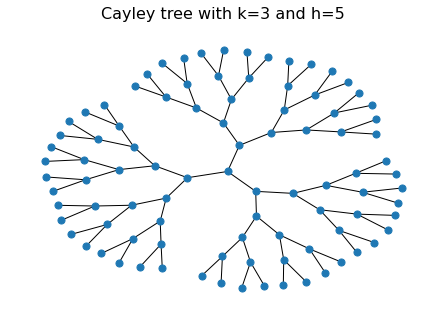

In [8]:
k = 3
h = 5
G = cayley_tree(k, h)

nx.draw_kamada_kawai(G, node_size=50)
ax = plt.gca()
ax.set_title(f"Cayley tree with k={k} and h={h}", fontsize=16)
plt.show()

*a) Calculate the total number of nodes such a tree possesses given $k$ and $h.$*

The first layer grows $k$ nodes and after that $(k-1) N_i$ nodes, where $N_i$ is the number of nodes in the previous layer. Thus we get the recursion for the number of nodes in each layer: $N_0 = 1,\ N_1 = k,\ N_{i+1} = (k-1) N_i.$ Resolving this recursion yields $N_i = k (k-1)^{i-1}$ for $i \ge 1$ and thus in total for the whole Cayley tree

$$N = N_0 + \sum_{i=1}^h N_i = 1 + k \sum_{i=0}^{h-1} (k-1)^i = 1 + k \frac{(k-1)^{h} - 1}{(k-1) - 1} = \frac{k (k-1)^h - 2}{k - 2}.$$

*b) Calculate the number of leaf nodes and compare it to the number of inner nodes. What can you say about its ratio? (For which values of $k$ and $h$ the number of inner nodes exceeds the number of leaf nodes?)*

$$N_{\mathrm{inner}}^k(h) = 1 + k \sum_{i=0}^{h-2} (k-1)^i = \frac{k (k - 1)^h - 2k + 2}{(k-2)(k-1)},\ N_{\mathrm{outer}}^k(h) = k (k-1)^{h-1}$$

For $k=2$ we get the inequality $N_{\mathrm{inner}}^2(h) = 2 h - 1 \ge 2 = N_{\mathrm{outer}}^2(h)$ which is satisfied if $h \ge \frac{3}{2}.$ If $k=3$ then $N_{\mathrm{inner}}^3(h) = 3 \cdot 2^{h-1} - 2$ is obviously never greater than $N_{\mathrm{outer}}^3(h) = 3 \cdot 2^{h-1}.$ For $4 \le k \to \infty$ the number of inner nodes $N_{\mathrm{inner}}^k(h)$ grows less quickly than $N_{\mathrm{outer}}^k(h)$ does which can be shown via induction and thus there are always more outer nodes than inner nodes.

*c) Find an expression for the diameter of a Cayley tree in terms of the total number of nodes.*

No shortest path can be longer than $2h$ since every node is connected via the central node. Two leaves from different main branches have distance $2h.$ Thus the diameter is $2h.$

*d) Calculate the clustering coefficient.*

No nodes have any connected neighbors thus the clustering coefficient is 0.

## Problem 2

*Consider an Erdős–Rényi (ER) network with $N = 5000$ nodes and connection probability of node pairs of $p = 0.002.$*

*a) What is the expected number of edges and the average degree?*

$$\langle L \rangle = p \ \frac{N (N-1)}{2} = 24995 \approx 25000$$

$$\langle k \rangle = p \ (N - 1) = 9.998 \approx 10$$

*b) In which regime is the network and what is the critical value of $p=p_c$?*

The ER network is in connected regime because $\langle k \rangle > \log(N) \approx 8.5.$ The critical value is $p_c = \frac{1}{N - 1} \approx 0.0002.$

*c) What is the expected size of the giant component?*

Since the ER network is in its connected regime we expect the number of nodes in the giant component to be $N.$

*d) Suppose you are making a random ER network with 100 (or 1000) nodes and you want the average degree to be 5 (or 20). What approximate value for $p$ would you choose?*

Rearranging the formula from above we get $p = \frac{\langle k \rangle}{N - 1}.$ Thus for $N=100$ and $\langle k \rangle=5$ one could choose $p=0.05$ or $p=0.02$ for $N=1000$ and $\langle k \rangle=20.$

## Problem 3

*Find an approximate expression for the minimal number of trials you must throw a die to estimate whether it is biased or not.*